In [2]:
import re
import time
import psycopg2
import pandas as pd
from tqdm import tqdm
import geopy.distance
import matplotlib.pyplot as plt
import pickle

In [3]:
def plot_query_times(query_times, lab="", col="teal", save=False, filepath=None):
    query_nb = [i for i in range(1, len(query_times) + 1)]
    plt.plot(query_nb, query_times, marker=".", color=col, label=lab)
    plt.xlabel("Query number")
    plt.ylabel("Query execution time [ms]")
    
    if save:
        plt.show()
        plt.savefig(filepath, bbox_inches="tight", dpi=200)
        plt.close()
        
    # else:
    #     plt.show()

In [10]:
# Colors
blue_hex = "#3498db"    # Flat Blue
purple_hex = "#8e44ad"  # Amethyst Purple
orange_hex = "#e67e22"  # Carrot Orange
red_hex = "#c0392b"    # Alizarin Red

# Labels
lab_n_d = "Neo4j, Dijkstra"
lab_n_a = "Neo4j, A*"
lab_p_d = "PostgreSQL, Dijkstra"
lab_p_a = "PostgreSQL, A*"

query_times = 15
query_nb = [i for i in range(1, query_times + 1)]

query_times_long = 5
query_nb_long = [i for i in range(1, query_times_long + 1)]

# Loading the results

### krakow_30

In [5]:
#SHORT

#neo4j
dijkstra_short_directed_query_times_neo4j_30 = pickle.load(open("./results/krakow_30/dijkstra_short_directed_query_times_neo4j.bin", "rb"))
dijkstra_short_undirected_query_times_neo4j_30 = pickle.load(open("./results/krakow_30/dijkstra_short_undirected_query_times_neo4j.bin", "rb"))
astar_short_directed_query_times_neo4j_30 = pickle.load(open("./results/krakow_30/astar_short_directed_query_times_neo4j.bin", "rb"))
astar_short_undirected_query_times_neo4j_30 = pickle.load(open("./results/krakow_30/astar_short_undirected_query_times_neo4j.bin", "rb"))

# psql
dijkstra_short_directed_query_times_psql_30 = pickle.load(open("./results/krakow_30/dijkstra_short_directed_query_times_psql.bin", "rb"))
dijkstra_short_undirected_query_times_psql_30 = pickle.load(open("./results/krakow_30/dijkstra_short_undirected_query_times_psql.bin", "rb"))
astar_short_directed_query_times_psql_30 = pickle.load(open("./results/krakow_30/astar_short_directed_query_times_psql.bin", "rb"))
astar_short_undirected_query_times_psql_30 = pickle.load(open("./results/krakow_30/astar_short_undirected_query_times_psql.bin", "rb"))

### krakow_90

In [6]:
#SHORT

#neo4j
dijkstra_short_directed_query_times_neo4j_90 = pickle.load(open("./results/krakow_90/dijkstra_short_directed_query_times_neo4j.bin", "rb"))
dijkstra_short_undirected_query_times_neo4j_90 = pickle.load(open("./results/krakow_90/dijkstra_short_undirected_query_times_neo4j.bin", "rb"))
astar_short_directed_query_times_neo4j_90 = pickle.load(open("./results/krakow_90/astar_short_directed_query_times_neo4j.bin", "rb"))
astar_short_undirected_query_times_neo4j_90 = pickle.load(open("./results/krakow_90/astar_short_undirected_query_times_neo4j.bin", "rb"))

# psql
dijkstra_short_directed_query_times_psql_90 = pickle.load(open("./results/krakow_90/dijkstra_short_directed_query_times_psql.bin", "rb"))
dijkstra_short_undirected_query_times_psql_90 = pickle.load(open("./results/krakow_90/dijkstra_short_undirected_query_times_psql.bin", "rb"))
astar_short_directed_query_times_psql_90 = pickle.load(open("./results/krakow_90/astar_short_directed_query_times_psql.bin", "rb"))
astar_short_undirected_query_times_psql_90 = pickle.load(open("./results/krakow_90/astar_short_undirected_query_times_psql.bin", "rb"))

#LONG

#neo4j
dijkstra_long_directed_query_times_neo4j_90 = pickle.load(open("./results/krakow_90/dijkstra_long_directed_query_times_neo4j.bin", "rb"))
dijkstra_long_undirected_query_times_neo4j_90 = pickle.load(open("./results/krakow_90/dijkstra_long_undirected_query_times_neo4j.bin", "rb"))
astar_long_directed_query_times_neo4j_90 = pickle.load(open("./results/krakow_90/astar_long_directed_query_times_neo4j.bin", "rb"))
astar_long_undirected_query_times_neo4j_90 = pickle.load(open("./results/krakow_90/astar_long_undirected_query_times_neo4j.bin", "rb"))

# psql
dijkstra_long_directed_query_times_psql_90 = pickle.load(open("./results/krakow_90/dijkstra_long_directed_query_times_psql.bin", "rb"))
dijkstra_long_undirected_query_times_psql_90 = pickle.load(open("./results/krakow_90/dijkstra_long_undirected_query_times_psql.bin", "rb"))
astar_long_directed_query_times_psql_90 = pickle.load(open("./results/krakow_90/astar_long_directed_query_times_psql.bin", "rb"))
astar_long_undirected_query_times_psql_90 = pickle.load(open("./results/krakow_90/astar_long_undirected_query_times_psql.bin", "rb"))

### krakow_120

In [7]:
#SHORT

#neo4j
dijkstra_short_directed_query_times_neo4j_120 = pickle.load(open("./results/krakow_120/dijkstra_short_directed_query_times_neo4j.bin", "rb"))
dijkstra_short_undirected_query_times_neo4j_120 = pickle.load(open("./results/krakow_120/dijkstra_short_undirected_query_times_neo4j.bin", "rb"))

# psql
dijkstra_short_directed_query_times_psql_120 = pickle.load(open("./results/krakow_120/dijkstra_short_directed_query_times_psql.bin", "rb"))
dijkstra_short_undirected_query_times_psql_120 = pickle.load(open("./results/krakow_120/dijkstra_short_undirected_query_times_psql.bin", "rb"))

#LONG

#neo4j
dijkstra_long_directed_query_times_neo4j_120 = pickle.load(open("./results/krakow_120/dijkstra_long_directed_query_times_neo4j.bin", "rb"))
dijkstra_long_undirected_query_times_neo4j_120 = pickle.load(open("./results/krakow_120/dijkstra_long_undirected_query_times_neo4j.bin", "rb"))

# psql
dijkstra_long_directed_query_times_psql_120 = pickle.load(open("./results/krakow_120/dijkstra_long_directed_query_times_psql.bin", "rb"))
dijkstra_long_undirected_query_times_psql_120 = pickle.load(open("./results/krakow_120/dijkstra_long_undirected_query_times_psql.bin", "rb"))


# Plots

## Short distance

### directed

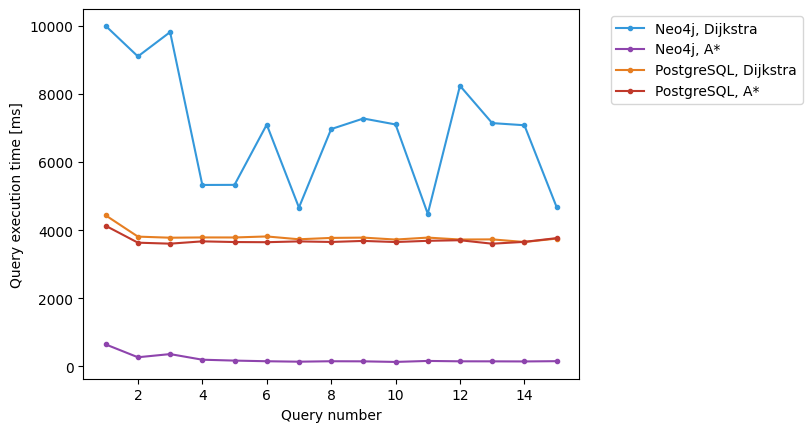

In [126]:
plot_query_times(dijkstra_short_directed_query_times_neo4j_30, col=blue_hex, lab="Neo4j, Dijkstra")
plot_query_times(astar_short_directed_query_times_neo4j_30, col=purple_hex, lab="Neo4j, A*")

plot_query_times(dijkstra_short_directed_query_times_psql_30, col=orange_hex, lab="PostgreSQL, Dijkstra")
plot_query_times(astar_short_directed_query_times_psql_30, col=red_hex, lab="PostgreSQL, A*")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

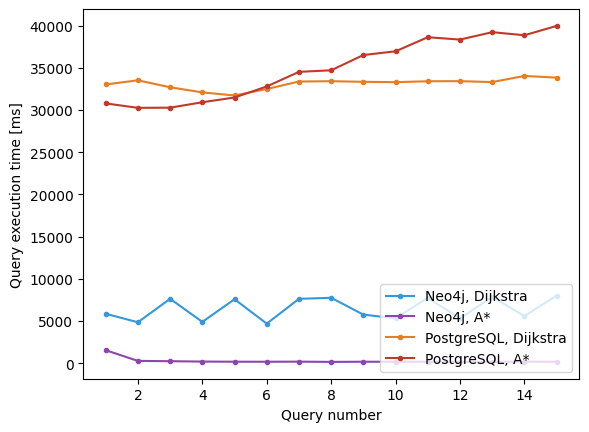

In [127]:
plot_query_times(dijkstra_short_directed_query_times_neo4j_90, col=blue_hex, lab="Neo4j, Dijkstra")
plot_query_times(astar_short_directed_query_times_neo4j_90, col=purple_hex, lab="Neo4j, A*")

plot_query_times(dijkstra_short_directed_query_times_psql_90, col=orange_hex, lab="PostgreSQL, Dijkstra")
plot_query_times(astar_short_directed_query_times_psql_90, col=red_hex, lab="PostgreSQL, A*")
plt.legend(loc ="lower right")
plt.show()

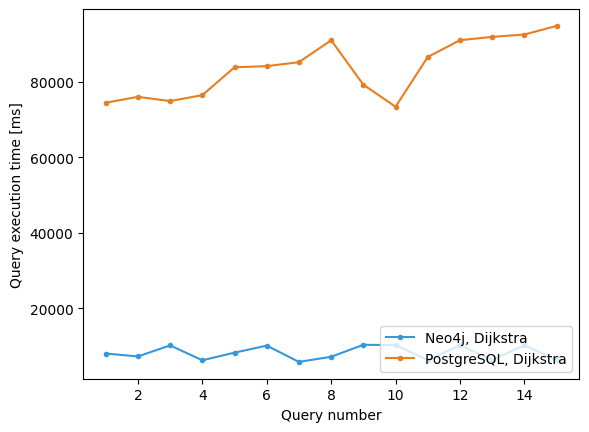

In [128]:
plot_query_times(dijkstra_short_directed_query_times_neo4j_120, col=blue_hex, lab="Neo4j, Dijkstra")
plot_query_times(dijkstra_short_directed_query_times_psql_120, col=orange_hex, lab="PostgreSQL, Dijkstra")
plt.legend(loc ="lower right")
plt.show()

### undirected

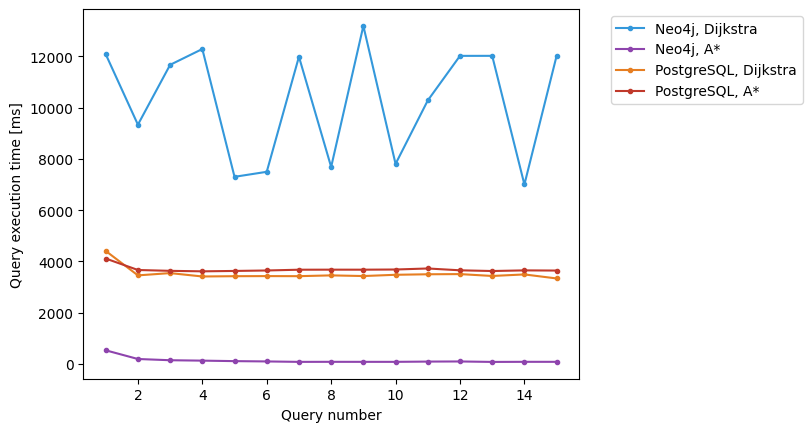

In [129]:
plot_query_times(dijkstra_short_undirected_query_times_neo4j_30, col=blue_hex, lab="Neo4j, Dijkstra")
plot_query_times(astar_short_undirected_query_times_neo4j_30, col=purple_hex, lab="Neo4j, A*")

plot_query_times(dijkstra_short_undirected_query_times_psql_30, col=orange_hex, lab="PostgreSQL, Dijkstra")
plot_query_times(astar_short_undirected_query_times_psql_30, col=red_hex, lab="PostgreSQL, A*")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

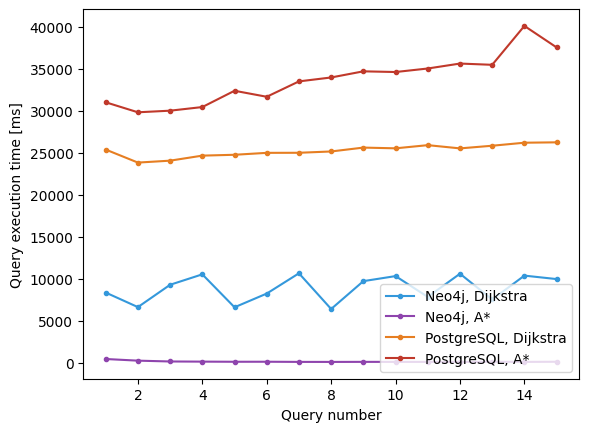

In [130]:
plot_query_times(dijkstra_short_undirected_query_times_neo4j_90, col=blue_hex, lab="Neo4j, Dijkstra")
plot_query_times(astar_short_undirected_query_times_neo4j_90, col=purple_hex, lab="Neo4j, A*")

plot_query_times(dijkstra_short_undirected_query_times_psql_90, col=orange_hex, lab="PostgreSQL, Dijkstra")
plot_query_times(astar_short_undirected_query_times_psql_90, col=red_hex, lab="PostgreSQL, A*")
plt.legend(loc ="lower right")
plt.show()

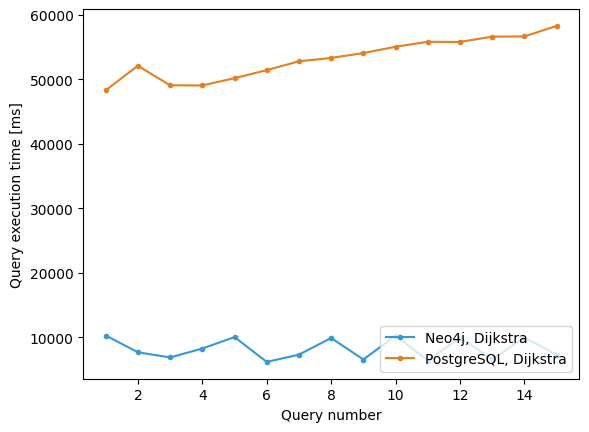

In [131]:
plot_query_times(dijkstra_short_undirected_query_times_neo4j_120, col=blue_hex, lab="Neo4j, Dijkstra")
plot_query_times(dijkstra_short_undirected_query_times_psql_120, col=orange_hex, lab="PostgreSQL, Dijkstra")
plt.legend(loc ="lower right")
plt.show()

### merged

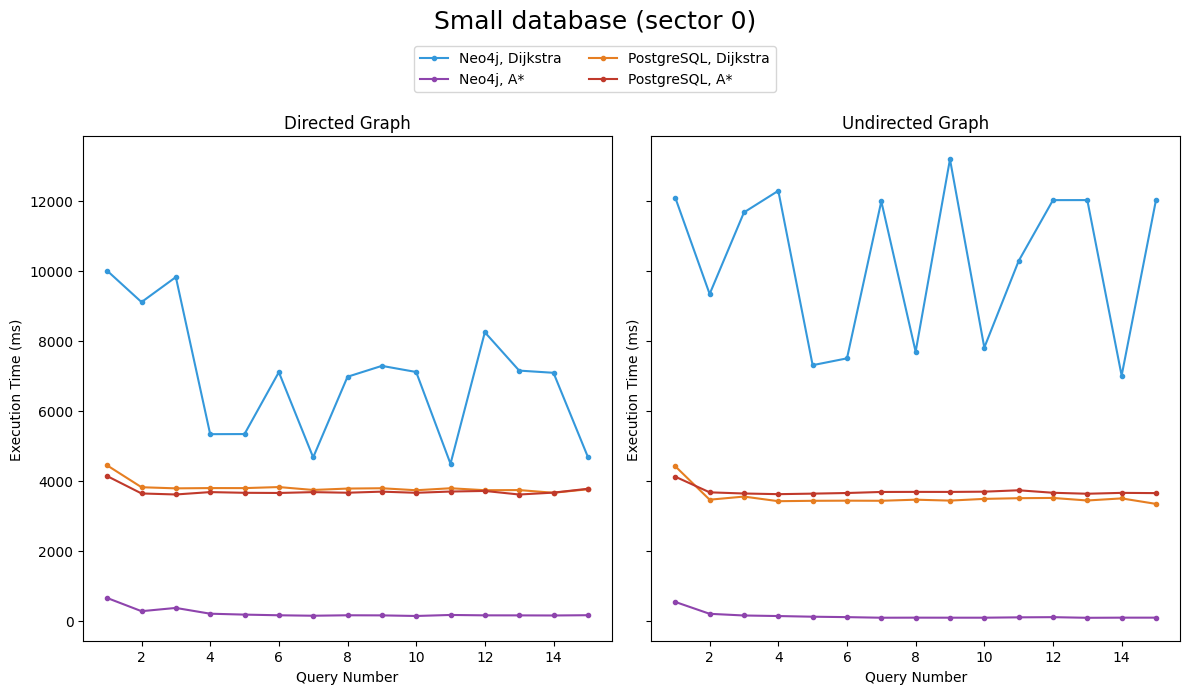

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

axes[0].plot(query_nb, dijkstra_short_directed_query_times_neo4j_30, color=blue_hex, label=lab_n_d, marker=".")
axes[0].plot(query_nb, astar_short_directed_query_times_neo4j_30, color=purple_hex, label=lab_n_a, marker=".")
axes[0].plot(query_nb, dijkstra_short_directed_query_times_psql_30, color=orange_hex, label=lab_p_d, marker=".")
axes[0].plot(query_nb, astar_short_directed_query_times_psql_30, color=red_hex, label=lab_p_a, marker=".")
axes[0].set_title('Directed Graph')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')

axes[1].plot(query_nb, dijkstra_short_undirected_query_times_neo4j_30, color=blue_hex, label=lab_n_d, marker=".")
axes[1].plot(query_nb, astar_short_undirected_query_times_neo4j_30, color=purple_hex, label=lab_n_a, marker=".")
axes[1].plot(query_nb, dijkstra_short_undirected_query_times_psql_30, color=orange_hex, label=lab_p_d, marker=".")
axes[1].plot(query_nb, astar_short_undirected_query_times_psql_30, color=red_hex, label=lab_p_a, marker=".")
axes[1].set_title('Undirected Graph')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')

fig.legend(labels=[lab_n_d, lab_n_a, lab_p_d, lab_p_a],
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

fig.suptitle('Small database (sector 0)', y=1.15, fontsize=18)

plt.show()

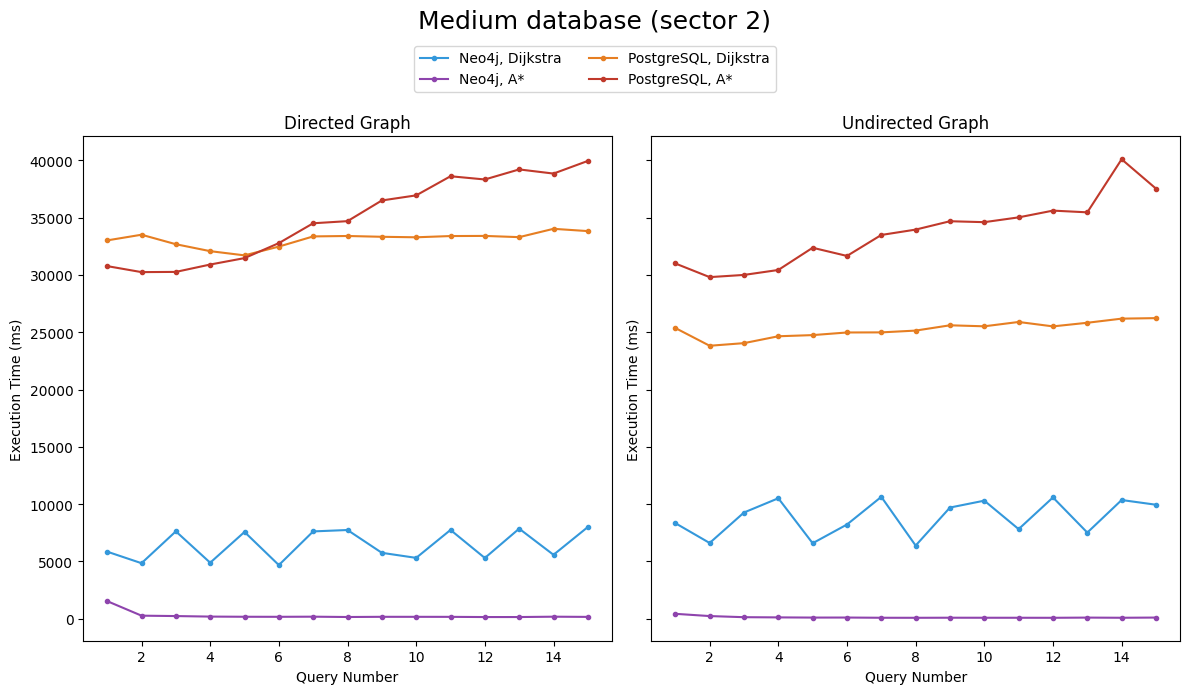

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

axes[0].plot(query_nb, dijkstra_short_directed_query_times_neo4j_90, color=blue_hex, label=lab_n_d, marker=".")
axes[0].plot(query_nb, astar_short_directed_query_times_neo4j_90, color=purple_hex, label=lab_n_a, marker=".")
axes[0].plot(query_nb, dijkstra_short_directed_query_times_psql_90, color=orange_hex, label=lab_p_d, marker=".")
axes[0].plot(query_nb, astar_short_directed_query_times_psql_90, color=red_hex, label=lab_p_a, marker=".")
axes[0].set_title('Directed Graph')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')

axes[1].plot(query_nb, dijkstra_short_undirected_query_times_neo4j_90, color=blue_hex, label=lab_n_d, marker=".")
axes[1].plot(query_nb, astar_short_undirected_query_times_neo4j_90, color=purple_hex, label=lab_n_a, marker=".")
axes[1].plot(query_nb, dijkstra_short_undirected_query_times_psql_90, color=orange_hex, label=lab_p_d, marker=".")
axes[1].plot(query_nb, astar_short_undirected_query_times_psql_90, color=red_hex, label=lab_p_a, marker=".")
axes[1].set_title('Undirected Graph')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')

fig.legend(labels=[lab_n_d, lab_n_a, lab_p_d, lab_p_a],
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

fig.suptitle('Medium database (sector 2)', y=1.15, fontsize=18)

plt.show()

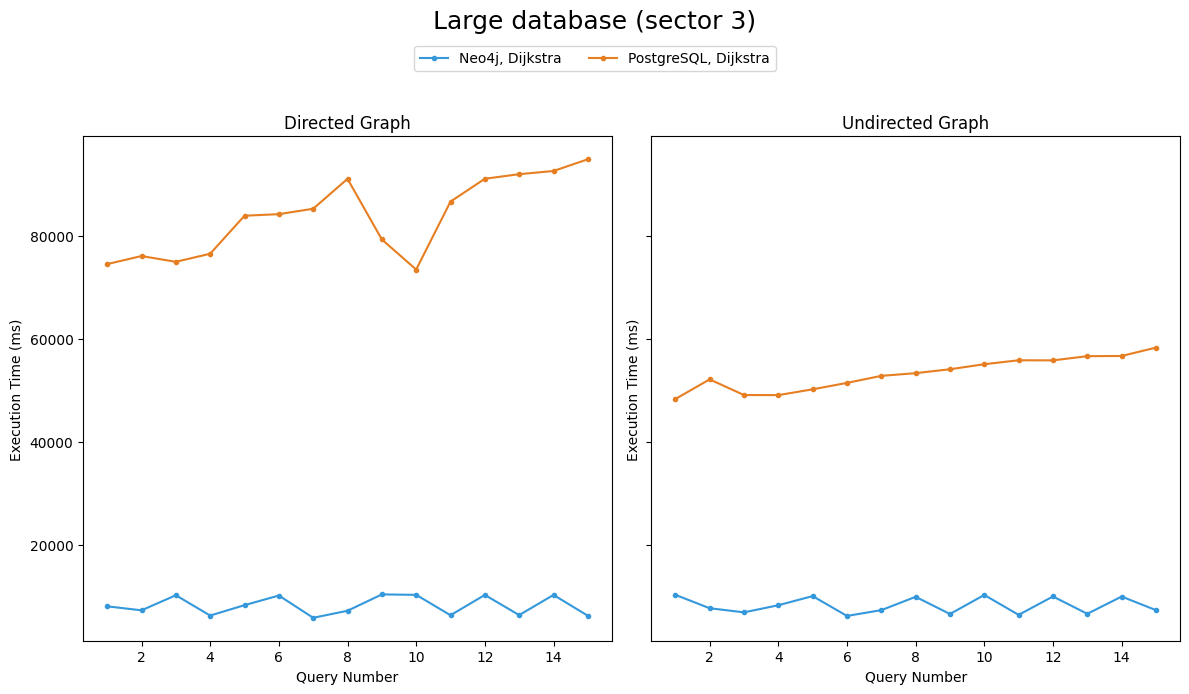

In [168]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

axes[0].plot(query_nb, dijkstra_short_directed_query_times_neo4j_120, color=blue_hex, label=lab_n_d, marker=".")
axes[0].plot(query_nb, dijkstra_short_directed_query_times_psql_120, color=orange_hex, label=lab_p_d, marker=".")
axes[0].set_title('Directed Graph')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')

axes[1].plot(query_nb, dijkstra_short_undirected_query_times_neo4j_120, color=blue_hex, label=lab_n_d, marker=".")
axes[1].plot(query_nb, dijkstra_short_undirected_query_times_psql_120, color=orange_hex, label=lab_p_d, marker=".")
axes[1].set_title('Undirected Graph')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')

fig.legend(labels=[lab_n_d, lab_p_d],
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

fig.suptitle('Large database (sector 3)', y=1.15, fontsize=18)

plt.show()

## Long distance

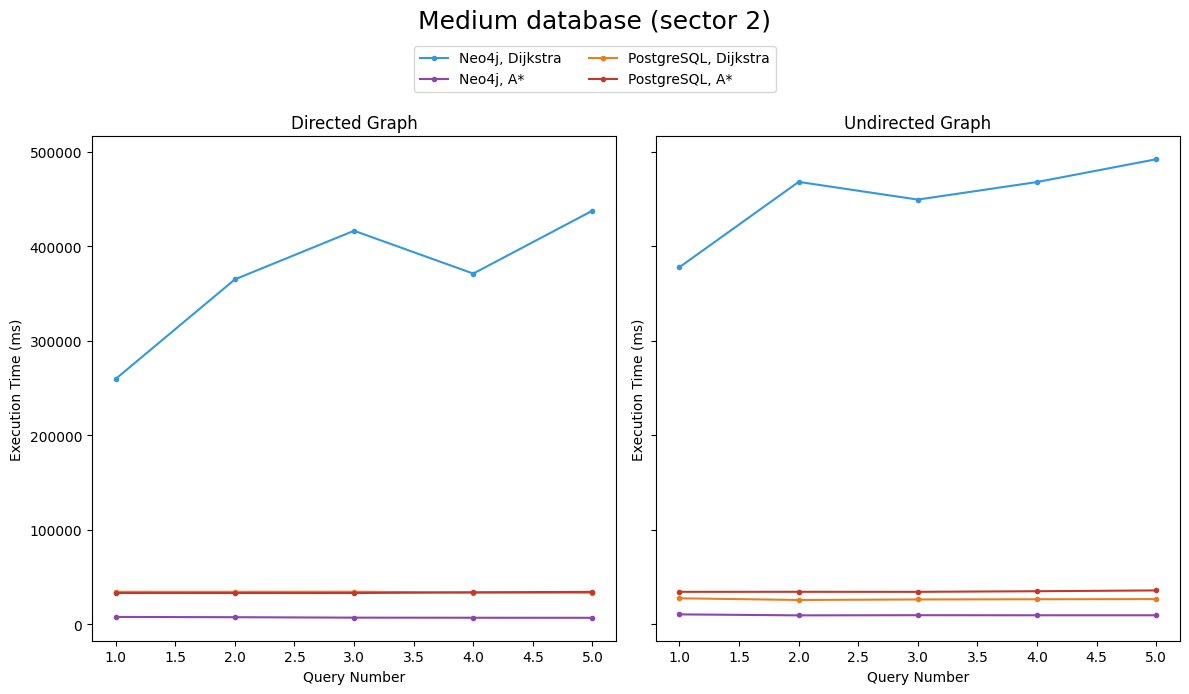

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_neo4j_90, color=blue_hex, label=lab_n_d, marker=".")
axes[0].plot(query_nb_long, astar_long_directed_query_times_neo4j_90, color=purple_hex, label=lab_n_a, marker=".")
axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_psql_90[:5], color=orange_hex, label=lab_p_d, marker=".")
axes[0].plot(query_nb_long, astar_long_directed_query_times_psql_90[:5], color=red_hex, label=lab_p_a, marker=".")
axes[0].set_title('Directed Graph')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')

axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_neo4j_90, color=blue_hex, label=lab_n_d, marker=".")
axes[1].plot(query_nb_long, astar_long_undirected_query_times_neo4j_90, color=purple_hex, label=lab_n_a, marker=".")
axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_psql_90[:5], color=orange_hex, label=lab_p_d, marker=".")
axes[1].plot(query_nb_long, astar_long_undirected_query_times_psql_90[:5], color=red_hex, label=lab_p_a, marker=".")
axes[1].set_title('Undirected Graph')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')

fig.legend(labels=[lab_n_d, lab_n_a, lab_p_d, lab_p_a],
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

fig.suptitle('Medium database (sector 2)', y=1.15, fontsize=18)

plt.show()

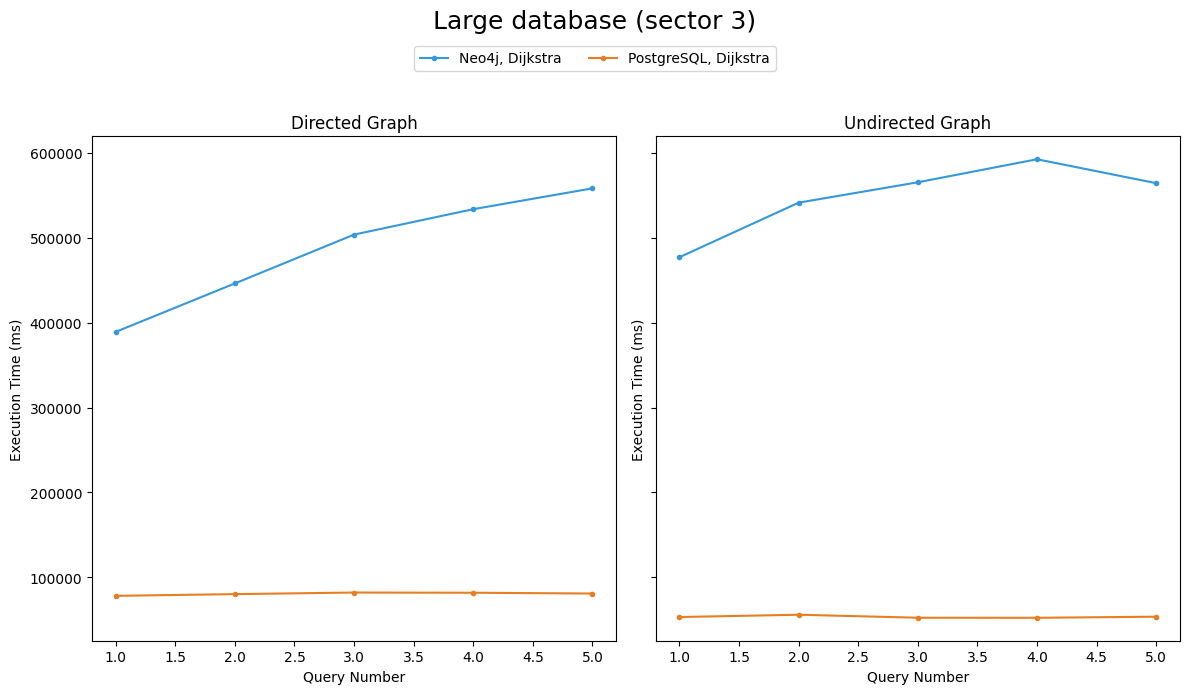

In [171]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_neo4j_120, color=blue_hex, label=lab_n_d, marker=".")
axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_psql_120[:5], color=orange_hex, label=lab_p_d, marker=".")
axes[0].set_title('Directed Graph')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')

axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_neo4j_120, color=blue_hex, label=lab_n_d, marker=".")
axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_psql_120[:5], color=orange_hex, label=lab_p_d, marker=".")
axes[1].set_title('Undirected Graph')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')

fig.legend(labels=[lab_n_d, lab_p_d],
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

fig.suptitle('Large database (sector 3)', y=1.15, fontsize=18)

plt.show()

### Analysis

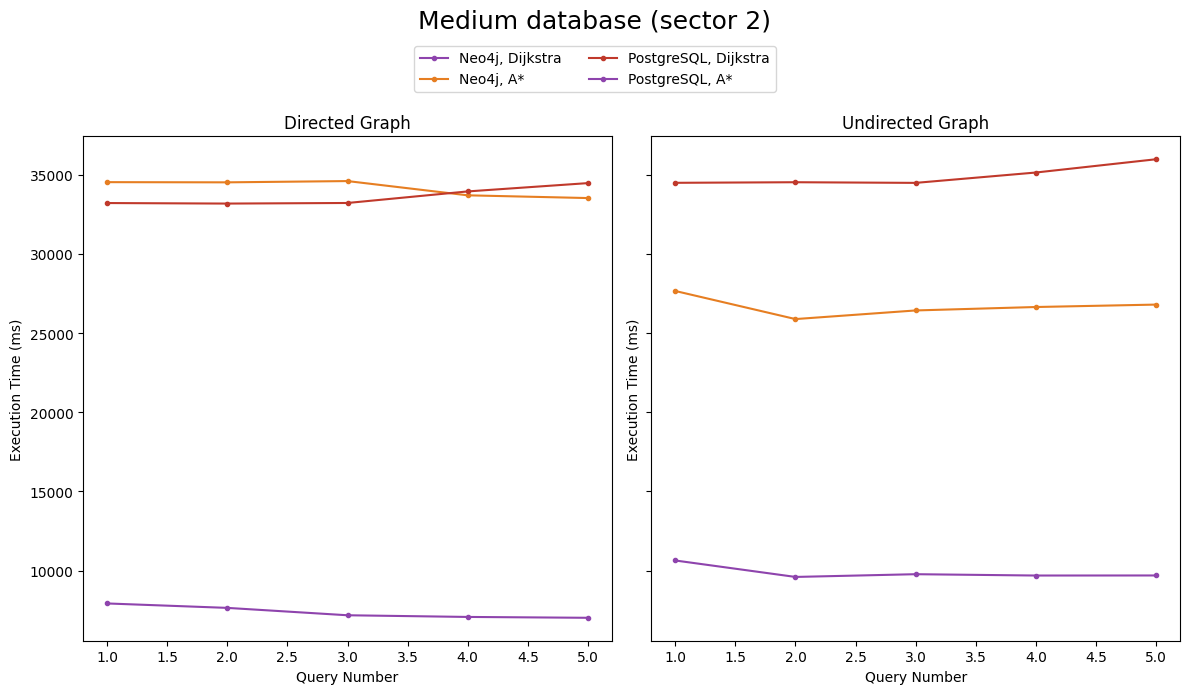

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_neo4j_90, color=blue_hex, label=lab_n_d, marker=".")
axes[0].plot(query_nb_long, astar_long_directed_query_times_neo4j_90, color=purple_hex, label=lab_n_a, marker=".")
axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_psql_90[:5], color=orange_hex, label=lab_p_d, marker=".")
axes[0].plot(query_nb_long, astar_long_directed_query_times_psql_90[:5], color=red_hex, label=lab_p_a, marker=".")
axes[0].set_title('Directed Graph')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')

# axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_neo4j_90, color=blue_hex, label=lab_n_d, marker=".")
axes[1].plot(query_nb_long, astar_long_undirected_query_times_neo4j_90, color=purple_hex, label=lab_n_a, marker=".")
axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_psql_90[:5], color=orange_hex, label=lab_p_d, marker=".")
axes[1].plot(query_nb_long, astar_long_undirected_query_times_psql_90[:5], color=red_hex, label=lab_p_a, marker=".")
axes[1].set_title('Undirected Graph')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')

fig.legend(labels=[lab_n_d, lab_n_a, lab_p_d, lab_p_a],
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

fig.suptitle('Medium database (sector 2)', y=1.15, fontsize=18)

plt.show()

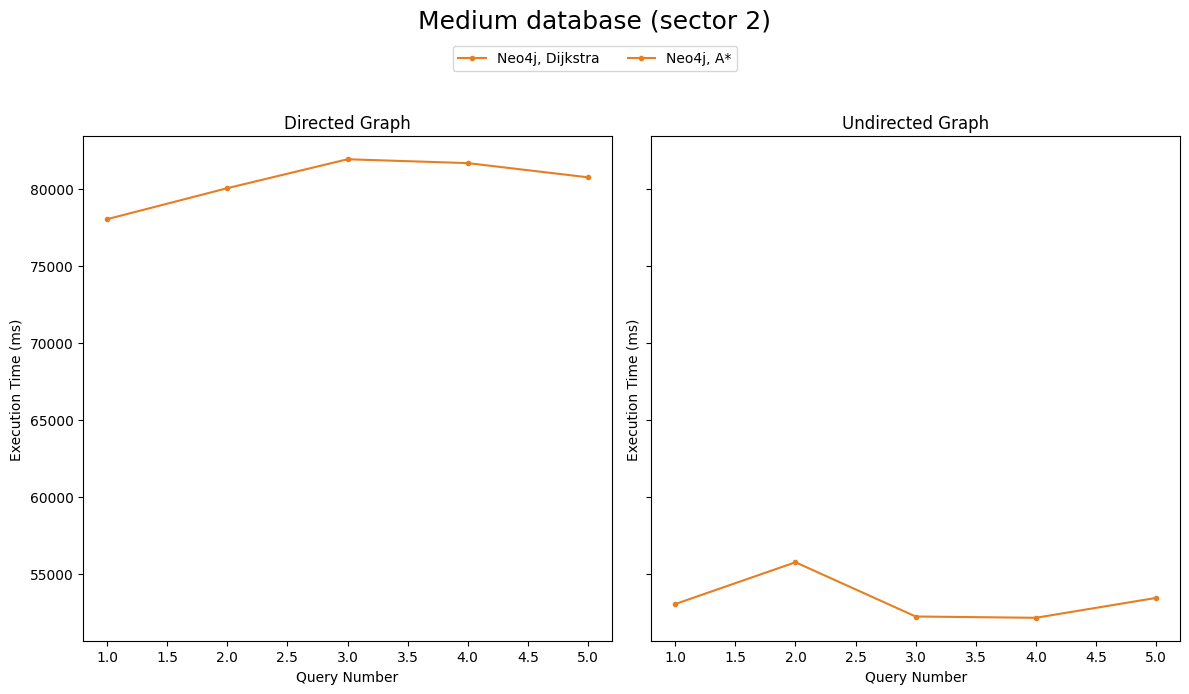

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)


axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_psql_120[:5], color=orange_hex, label=lab_p_d, marker=".")
axes[0].set_title('Directed Graph')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')

axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_psql_120[:5], color=orange_hex, label=lab_p_d, marker=".")
axes[1].set_title('Undirected Graph')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')

fig.legend(labels=[lab_n_d, lab_n_a, lab_p_d, lab_p_a],
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

fig.suptitle('Medium database (sector 2)', y=1.15, fontsize=18)

plt.show()

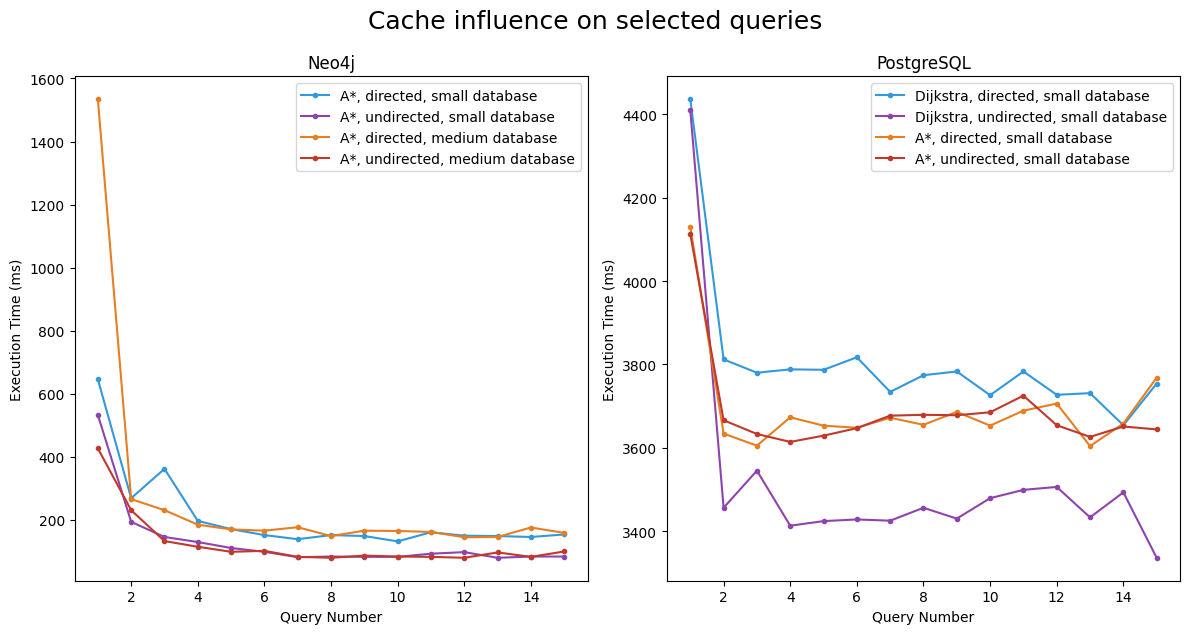

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].plot(query_nb, astar_short_directed_query_times_neo4j_30, color=blue_hex, label="A*, directed, small database", marker=".")
axes[0].plot(query_nb, astar_short_undirected_query_times_neo4j_30, color=purple_hex, label="A*, undirected, small database", marker=".")
axes[0].plot(query_nb, astar_short_directed_query_times_neo4j_90, color=orange_hex, label="A*, directed, medium database", marker=".")
axes[0].plot(query_nb, astar_short_undirected_query_times_neo4j_90, color=red_hex, label="A*, undirected, medium database", marker=".")

axes[0].set_title('Neo4j')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')
axes[0].legend()

axes[1].plot(query_nb, dijkstra_short_directed_query_times_psql_30, color=blue_hex, label="Dijkstra, directed, small database", marker=".")
axes[1].plot(query_nb, dijkstra_short_undirected_query_times_psql_30, color=purple_hex, label="Dijkstra, undirected, small database", marker=".")
axes[1].plot(query_nb, astar_short_directed_query_times_psql_30, color=orange_hex, label="A*, directed, small database", marker=".")
axes[1].plot(query_nb, astar_short_undirected_query_times_psql_30, color=red_hex, label="A*, undirected, small database", marker=".")

axes[1].set_title('PostgreSQL')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')
axes[1].legend()

plt.tight_layout()

fig.suptitle('Cache influence on selected queries', y=1.05, fontsize=18)

plt.show()

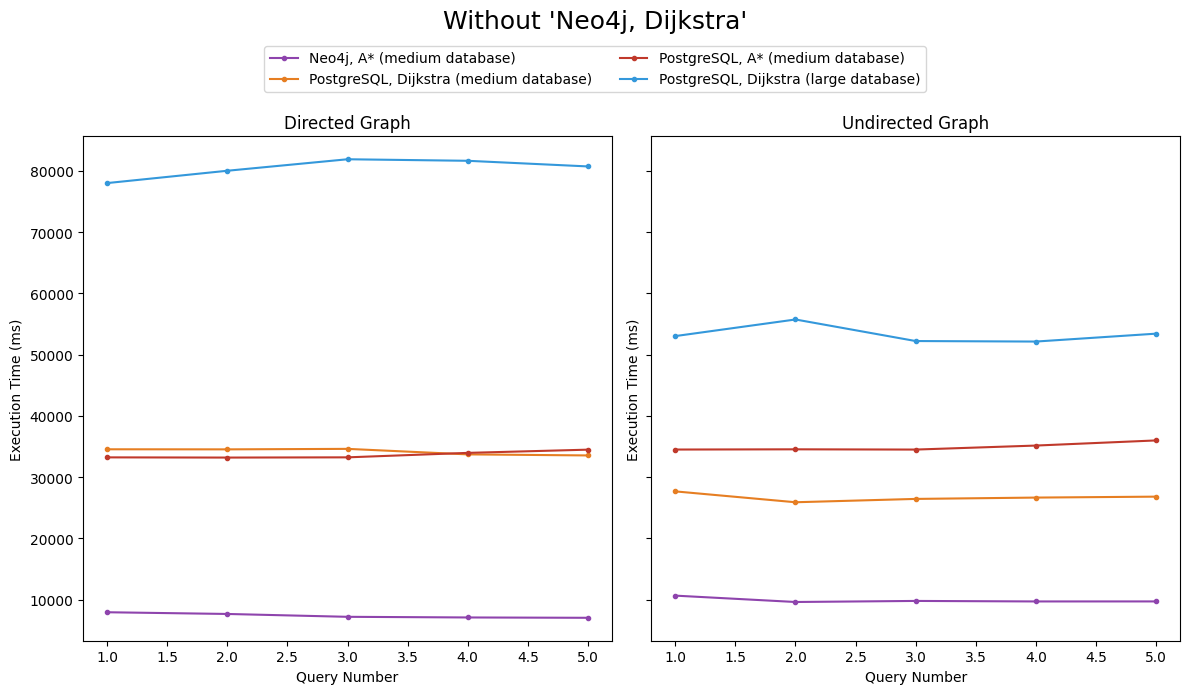

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_neo4j_90, color=blue_hex, label=lab_n_d, marker=".")
axes[0].plot(query_nb_long, astar_long_directed_query_times_neo4j_90, color=purple_hex, label=lab_n_a + " (medium database)", marker=".")
axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_psql_90[:5], color=orange_hex, label=lab_p_d  + " (medium database)", marker=".")
axes[0].plot(query_nb_long, astar_long_directed_query_times_psql_90[:5], color=red_hex, label=lab_p_a + " (medium database)", marker=".")
axes[0].plot(query_nb_long, dijkstra_long_directed_query_times_psql_120[:5], color=blue_hex, label=lab_p_d + " (large database)", marker=".")

axes[0].set_title('Directed Graph')
axes[0].set_xlabel('Query Number')
axes[0].set_ylabel('Execution Time (ms)')

# axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_neo4j_90, color=blue_hex, label=lab_n_d, marker=".")
axes[1].plot(query_nb_long, astar_long_undirected_query_times_neo4j_90, color=purple_hex, label=lab_n_a + " (medium database)", marker=".")
axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_psql_90[:5], color=orange_hex, label=lab_p_d + " (medium database)", marker=".")
axes[1].plot(query_nb_long, astar_long_undirected_query_times_psql_90[:5], color=red_hex, label=lab_p_a + " (medium database)", marker=".")
axes[1].plot(query_nb_long, dijkstra_long_undirected_query_times_psql_120[:5], color=blue_hex, label=lab_p_d + " (large database)", marker=".")

axes[1].set_title('Undirected Graph')
axes[1].set_xlabel('Query Number')
axes[1].set_ylabel('Execution Time (ms)')

fig.legend([lab_n_a + " (medium database)", lab_p_d  + " (medium database)", lab_p_a + " (medium database)", lab_p_d + " (large database)"],
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

fig.suptitle("Without 'Neo4j, Dijkstra'", y=1.15, fontsize=18)

plt.show()